# Fig_4 : SDSS-PS1 stellar offsets and QSO contours 

In [44]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patheffects as pe
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import Column
from astropy.table import join
import celerite
import modules as mod
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

In [45]:
# Read in a summary table, made in
# ../code/AC_summary_photo_offsets.ipynb 
summary = Table.read('../code/summary_combined_lc_info.txt', format='ascii')

First, plot just Fig.4 for Quasars, showing the underlying data and the KDE contous with 30%,70%,90% levels 

In [116]:
summary

lcname,SDSS_uN,SDSS_medianuerr,SDSS_medianumag,SDSS_gN,SDSS_mediangerr,SDSS_mediangmag,SDSS_rN,SDSS_medianrerr,SDSS_medianrmag,SDSS_iN,SDSS_medianierr,SDSS_medianimag,SDSS_zN,SDSS_medianzerr,SDSS_medianzmag,PS1_gN,PS1_mediangerr,PS1_mediangmag,PS1_rN,PS1_medianrerr,PS1_medianrmag,PS1_iN,PS1_medianierr,PS1_medianimag,PS1_zN,PS1_medianzerr,PS1_medianzmag,PS1_yN,PS1_medianyerr,PS1_medianymag,PTF_1N,PTF_median1err,PTF_median1mag,PTF_2N,PTF_median2err,PTF_median2mag,CRTS_wN,CRTS_medianwerr,CRTS_medianwmag
str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1441903.txt,56.0,0.073,20.506500000000003,55.0,0.028,20.207,55.0,0.028,20.06,56.0,0.031,19.7965,54.0,0.093,19.7545,15.0,0.0713645,20.654379,21.0,0.0625128,20.400947,11.0,0.0465617,20.246757,7.0,0.0920465,20.129613,3.0,0.185767,19.925352,0.0,nan,nan,16.0,0.1405,20.468,123.0,0.31,20.11
908716.txt,56.0,0.033,19.265,58.0,0.014,18.951999999999998,59.0,0.013,18.679,56.0,0.015,18.6005,59.0,0.036,18.572,8.0,0.0199587,19.207027500000002,11.0,0.0198069,18.830835,14.0,0.0174808,18.7201345,14.0,0.037025,18.7127095,16.0,0.0734949,18.746155,0.0,nan,nan,15.0,0.052,18.802,261.0,0.15,18.68
100520.txt,37.0,0.029,18.945,34.0,0.015,18.7245,36.0,0.014,18.5345,37.0,0.017,18.438,36.0,0.031,18.250500000000002,11.0,0.0148272,18.623022,19.0,0.0136626,18.588853,10.0,0.012125799999999999,18.425458,13.0,0.0249324,18.274665,7.0,0.0454908,18.266294,0.0,nan,nan,2.0,0.0605,18.507,113.0,0.08,18.33
3759755.txt,68.0,0.079,20.3925,69.0,0.023,20.145,70.0,0.03,20.1095,70.0,0.034,19.7745,71.0,0.098,19.71,9.0,0.0421427,20.278632,9.0,0.0423416,20.149534,9.0,0.03603,19.84147,11.0,0.0565525,19.791262,9.0,0.130102,19.770823,0.0,nan,nan,20.0,0.113,20.2825,183.0,0.28,19.91
505877.txt,6.0,0.0475,19.465,7.0,0.019,19.322,6.0,0.0215,18.988500000000002,6.0,0.0235,18.820999999999998,6.0,0.0505,18.4535,12.0,0.020718550000000002,19.2999495,14.0,0.019243049999999998,19.035913,10.0,0.01925445,18.9167575,13.0,0.0263498,18.51926,11.0,0.063562,18.694333,0.0,nan,nan,26.0,0.0595,18.8245,370.0,0.16,18.79
248292.txt,52.0,0.075,20.439999999999998,54.0,0.029,20.478,55.0,0.037,20.484,56.0,0.0485,20.307,56.0,0.129,20.2175,9.0,0.0651289,20.801468,20.0,0.106127,20.874993000000003,10.0,0.07561425,20.478017,10.0,0.13968150000000001,20.282853,2.0,0.09941805000000001,20.0306985,2.0,0.13,20.9,0.0,nan,nan,119.0,0.2,20.45
1225760.txt,114.0,0.055,20.0255,122.0,0.02,19.9285,127.0,0.023,19.882,126.0,0.026,19.725,122.0,0.109,19.761000000000003,9.0,0.0552703,20.392363,12.0,0.04928135,20.215812,13.0,0.0424295,19.969071,10.0,0.101491,20.015992,5.0,0.177989,19.87847,0.0,nan,nan,12.0,0.103,20.198,183.0,0.25,19.86
953706.txt,50.0,0.073,20.377499999999998,58.0,0.024,20.0335,59.0,0.019,19.356,59.0,0.021,19.291,58.0,0.0665,19.33,7.0,0.0343499,20.000643,18.0,0.02332075,19.3128485,6.0,0.0272724,19.3702535,11.0,0.0582776,19.419795,9.0,0.137477,19.293759,0.0,nan,nan,1.0,0.069,19.381,278.0,0.2,19.39
3537034.txt,55.0,0.042,19.676,53.0,0.015,19.437,55.0,0.014,19.11,56.0,0.018,19.1265,53.0,0.066,19.134,12.0,0.024544700000000003,19.242361000000002,15.0,0.0211546,18.979497,15.0,0.0185514,18.991981,16.0,0.04611045,19.079953,7.0,0.103589,18.951916,0.0,nan,nan,9.0,0.06,18.993,119.0,0.17,19.02


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-0.2, 1.5)

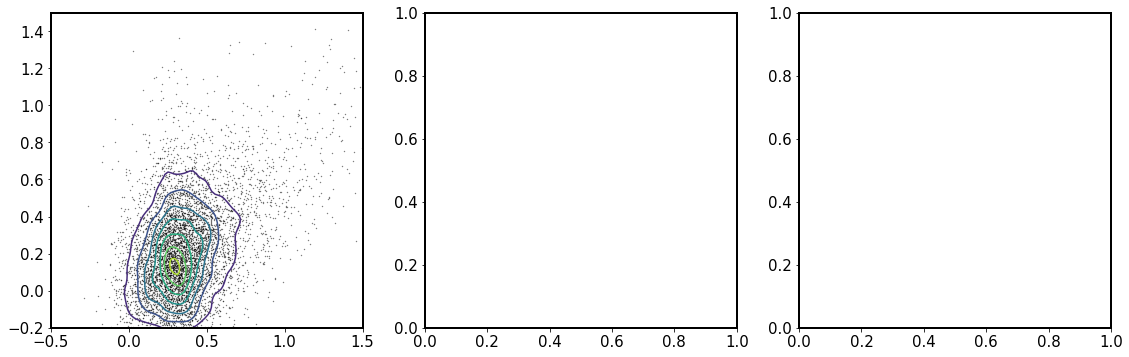

In [63]:
%matplotlib inline

sdss_gi = summary['SDSS_mediangmag'] - summary['SDSS_medianimag']

targetbands = 'r'
if targetbands is 'r' : 
        ymax = {'g':1.5,'r':0.2, 'i':   0,'z':0,   'y':0}
        ymin = {'g':-0.2,'r':-0.2,'i':-0.6,'z':-0.8,'y':-0.8}
        
originbands = 'gri'
nrows, ncols = 1,3
fig,ax = plt.subplots(nrows,ncols, figsize=(6*ncols+1,5.8*nrows))

i = 0 
levels = [0.3,0.7,0.9]
xlims = [-0.5,1.5]

#for f1 in originbands : 
f1 = originbands[0]
#ax[i].hexbin(sdss_gi, diff , extent=[-0.5,1.5,ymin[f1],ymax[f1]]) 
# (left, right, bottom, top). 
x = sdss_gi
y = summary['PS1_median'+f1+'mag'] - summary['SDSS_medianrmag']

mx = (xlims[0] < x ) * (x < xlims[1])
my = (ymin[f1] < y) * (y < ymax[f1])

m = mx * my 

x = x[m]
y = y[m]

ax[0].scatter(x,y,s=2, lw=0, c='k', alpha=0.5 )

xx, yy, z = mod._statsmodels_bivariate_kde(x,y,'scott',100,3,None)

# outline = ax[0].contour(xx, yy, z , 
#                     levels = mod.cumsum_contour_levels(z, levels), 
#                     cmap='Purples_r', linestyles='-' ,linewidths=2)
ax[0].contour(xx,yy,z)
ax[i].set_xlim(xlims)
ax[i].set_ylim(ymin[f1], ymax[f1])
#i += 1 

In [64]:
lev = mod.cumsum_contour_levels(z, levels)


Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.3, 0.7, 0.9]


 Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

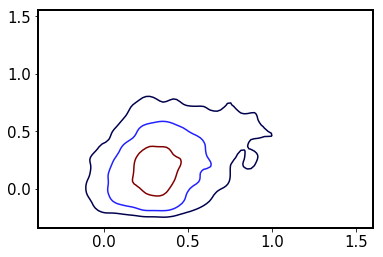

In [78]:
plt.contour(xx,yy,z, cmap='seismic', levels=lev)

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.3, 0.7, 0.9]

Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.3, 0.7, 0.9]

Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.3, 0.7, 0.9]


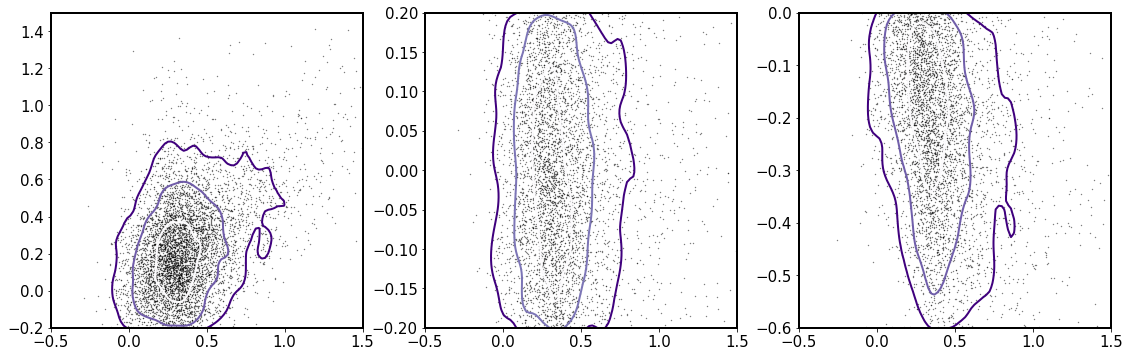

In [55]:
%matplotlib inline

sdss_gi = summary['SDSS_mediangmag'] - summary['SDSS_medianimag']

targetbands = 'r'
if targetbands is 'r' : 
        ymax = {'g':1.5,'r':0.2, 'i':   0,'z':0,   'y':0}
        ymin = {'g':-0.2,'r':-0.2,'i':-0.6,'z':-0.8,'y':-0.8}
        
originbands = 'gri'
nrows, ncols = 1,3
fig,ax = plt.subplots(nrows,ncols, figsize=(6*ncols+1,5.8*nrows))

i = 0 
levels = [0.3,0.7,0.9]
xlims = [-0.5,1.5]

for f1 in originbands : 
    #ax[i].hexbin(sdss_gi, diff , extent=[-0.5,1.5,ymin[f1],ymax[f1]]) 
    # (left, right, bottom, top). 
    x = sdss_gi
    y = summary['PS1_median'+f1+'mag'] - summary['SDSS_medianrmag']
    
    mx = (xlims[0] < x ) * (x < xlims[1])
    my = (ymin[f1] < y) * (y < ymax[f1])
    
    m = mx * my 
    
    x = x[m]
    y = y[m]
    
    ax[i].scatter(x,y,s=2, lw=0, c='k', alpha=0.5 )
    
    xx, yy, z = mod._statsmodels_bivariate_kde(x,y,'scott',100,3,None)
    
    outline = ax[i].contour(xx, yy, z , 
                        levels = mod.cumsum_contour_levels(z, levels), 
                        cmap='Purples_r', linestyles='-' ,linewidths=2)
    ax[i].set_xlim(xlims)
    ax[i].set_ylim(ymin[f1], ymax[f1])
    i += 1 

Add these to the readily written function that plots the stellar locus ... 

In [114]:
# Try to combine all in one function ...
%matplotlib inline 
def photometric_offset_sdss_ps1(data, summary, sdsscolors = 'gr', 
                                targetbands = 'grizz', originbands = 'grizy',
                                s82mag = 'mmed', s82err = 'msig',
                                cutoffmag = 19 , xlims = [-0.5,2.5],
                                correct_extinction = True, 
                                ebv_sfd = None,
                                extinction = 'SFD', nrows=2, ncols=3,
                                storeStarID = False,qsoContourLevels = [0.3,0.7,0.9]
                               ):
    '''
    Find photometric offsets between SDSS and PS1, 
    or another survey. 
    
    data :  a table containing ugriz SDSS stellar photometry, cross-matched to 
            the target survey, eg. SDSS-PS1
    summary : a table containing SDSS-PS1-CRTS average light curve photometry
        (medians) for quasars
    qsoContourLevels : an array of percentage of data to be included in 
        consecutive KDE levels drawn 
    sdsscolors : SDSS colors used to spread the stellar locus.  It can be 
           "gr" or "gi" (this mainly affects the x-axis limits)
           
    targetbands : SDSS bands to emulate. It can be "r" if all photometry 
           from target survey should be compared to SDSS(r), eg. 
           PS1(gri) --> SDSS(rrr),  or "grizz"  if each source band
           should be compared to an equivalent SDSS band, eg.
           PS1(grizy) --> SDSS(grizz)  (as in Tonry2012 for PS1).
           
    originbands : bands present in the origin survey. Eg, for PS1 they're 
           'grizy'
    
    cutoffmag : magnitude cutoff to ignore very faint stars according
          to SDSS target magnitude (eg. if yaxis is "grizz" then we filter
          by "grizz < cutoffmag" separately for each panel)
          
    xlims : limits on the x-axis in magnitudes (depends on the 
          SDSS color chosen for the x-axis). By default, [-0.5,2.5]
          
    correct_extinction : shall we correct for  interstellar extinction before 
          finding offsets ? If "True" , then "ebv_sfd"  needs to be provided,
          which is expected to be an array of the same length as the input SDSS 
          table ("data"). E(B-V) is selective extinction at V, or "reddening" : 
          E(B-V) = (B-V)_obs - (B-V)_true , with B,V being magnitudes in B,V. 
          Then the "total extinction" A(V) in a given filter, eg. V, is linked to 
          E(B-V) via the "extinction law"  : 
          A(V) = R(V) * E(B-V) , where R(V) is most commonly taken to be 3.1 . 
          The total extinction is expressed in magnitudes, that have to be
          subtracted from the observed magnitudes - object becomes brighter : 
          m_(V,corr) = m_(V,obs) - A(V), 
          so that the corrected distance modulus : 
          5 * log_10(d_(V,corr)) = m_(V,obs) - A(V) - M_V + 5 = 
                                 = m_(V,corr) - M_V + 5
        If correct_extinction = False , then we do not correct for extinction. 
                                 
    ebv_sfd : the table of interstellar reddening in units of Schlegel,Finkbeiner,Davis,
          which can be translated to total extinction A(b) in each band b using the 
          coefficients from Table6 in Schlegel,Finkbeiner2011, assuming RV = 3.1 .
          
    extinction : which reddening data from dustmaps  was used?  Eg. 
          "SFD"   Schlegel,Finkbeiner,Davis1998
          "Bayestar17"  
          
        # Example of obtaining SFD and Bayestar EBV_SFD using dustmaps
        # 1 : query 2D  SFD1998 map 
        import dustmaps.sfd
        dustmaps.sfd.fetch()
        from dustmaps.sfd import SFDQuery
        sfd = SFDQuery()
        coords  = SkyCoord(sdss_ps1['ra_sdss']*units.deg,
                           sdss_ps1['dec_sdss']*units.deg,
                           frame='icrs')
        ebv_1 = sfd(coords)

        # 2 query 3D Bayestar17 map 
        import dustmaps.bayestar
        dustmaps.bayestar.fetch()
        from dustmaps.bayestar import BayestarQuery
        coords  = SkyCoord(sdss_ps1['ra_sdss']*units.deg,
                           sdss_ps1['dec_sdss']*units.deg, 
                           distance=4*units.kpc,
                           frame='icrs')
        bayestar = BayestarQuery(max_samples=1)
        ebv_2 = bayestar(coords, mode='median')
        
        Both ebv_1  and ebv_2  would be appropriate examples of reddening 
        in SFD units. 
         
    nrows, ncols : number of rows and columns for the plot. 
        Recommended :  if originbands  = 'grizy'  (PS1) , then (nrows,ncols)=(3,2),
        if 'gri' (PS1)  --> (2,2) , 
        if 'gR' (PTF)  --> (1,2)
        if  'V' (CRTS) --> (1,1) 
    '''
    # $ Table 6 SF2011 Coefficients with RV=3.1 from EBV_SFD to A
    ebv_sfd_to_A = {'p1g':3.172, 'p1r':2.271, 'p1i':1.682, 'p1z':1.322, 'p1y':1.087,
        'sdssu':4.239, 'sdssg':3.303, 'sdssr':2.285, 'sdssi':1.698, 'sdssz': 1.263}

    # set file names ,  figure title .. 
    
    if correct_extinction : 
        #suptitle='Extinction corrected  : dustmaps ' +  extinction
        ext = 'ext-'+extinction
    else:
        #suptitle  = 'No extinction correction'
        ext = 'ext-NO'

    # extinction coefficients for SDSS Standards 
    #Cm = {'u':1.873, 'g':1.377, 'r':1.0, 'i':0.758, 'z':0.537}
    #Ar = sdss_ps1['AR_val']

    # we subtract the extinction coefficient, 
    # 'brightening' the given star
    #gmag = sdss_ps1['g_mMed'] -  Cm['g'] * Ar
    #rmag = sdss_ps1['r_mMed'] -  Cm['r'] * Ar
    #imag = sdss_ps1['i_mMed'] -  Cm['i'] * Ar  
    
    # correct SDSS photometry for extinction ... 
    if correct_extinction : 
        gmag = data['g'+s82mag] - ebv_sfd_to_A['sdssg'] * ebv_sfd
        rmag = data['r'+s82mag] - ebv_sfd_to_A['sdssr'] * ebv_sfd
        imag = data['i'+s82mag] - ebv_sfd_to_A['sdssi'] * ebv_sfd
    else:
        gmag = data['g'+s82mag] 
        rmag = data['r'+s82mag]
        imag = data['i'+s82mag] 


    # Coefficients from Schlegel,Finkbeiner2011
    #ps1_coeffs = {'g':3.172,  'r':2.271 , 'i':1.682, 
    #             'z':1.322 , 'y':1.087} 
    
    #xaxis : 'gi' or 'gr'
    if sdsscolors is 'gr': 
        x =  gmag-rmag   # SDSS (g-r)
        xQSOlims = [-0.25, 0.75]
        xFITlims = [0.1, 1.1]
    if sdsscolors is 'gi' : 
        x = gmag-imag  # SDSS (g-i)
        xQSOlims = [ -0.2, 0.8 ]
        xFITlims = [0.25, 1.5]
        

    #yaxis : 'SDSSgrizz' or 'SDSSr'
    if targetbands is 'grizz' : 
        ymin = {'g':-0.3,'r':-0.3,'i':-0.3,'z':-0.3,'y':-0.3}
        ymax = {'g':0.2,'r':0.2, 'i':0.2, 'z':0.2,   'y':0.2}
        SDSSfilters = 'grizz'
        
    if targetbands is 'r' : 
        ymax = {'g':1.5,'r':0.2, 'i':   0,'z':0,   'y':0}
        ymin = {'g':-0.2,'r':-0.2,'i':-0.6,'z':-0.8,'y':-0.8}
        SDSSfilters = len(originbands) * 'r'

    # define the plotting space 
    fig,axs = plt.subplots(nrows,ncols, figsize=(6*ncols+1,5.8*nrows))
    ax = np.ravel(axs)
    i = 0 
    
    # make a table to store coefficients derived from this set of data 
    coeffs  = {'x' : [], 'y' : [], 'B_0' : [], 'B_1':[]}
    
    sdss_gi = summary['SDSS_mediangmag'] - summary['SDSS_medianimag']
    
        
    for f1,f2 in zip(originbands, SDSSfilters):  
        print(' ')
        # store filters used 
        coeffs['x'].append('('+sdsscolors[0]+'-'+sdsscolors[1]+')_SDSS')
        coeffs['y'].append(f1 + '_P1-'+f2+'_SDSS)')
        
        print('Starting with ', len(data[f1+'MeanPSFMag']), 'stars in filter PS1 ', f1)
        
        # remove stars that have no PS1 obs in that filter 
        ma = data[f1+'MeanPSFMag'] > 0
        print('- Removing ', np.sum(~ma) , 
              ' objects that do not have PS1 obs in that filter')
        
        # remove faint stars to clean up the plot  : I'm sure that's 
        # what Tonry did, although not mentioned explicitly ... 
        mb = data[f2 + s82mag] < cutoffmag
        print('- Removing ', np.sum(~mb), 
              ' objects that are have SDSS ',f2, ' mag fainter  than ', cutoffmag)
        
        # apply the two criteria from the header 
        # to stripe82calibStars_v2.6.dat : 
        ###  1) To select sources with reliable photometry in the u and z bands
        ###     don't forget to require Nobs >= 4
        ###  2) to avoid a slight bias (~0.02 mag) at the faint end in the gri  
        ###     bands, require msig*sqrt(Nobs) < 0.03 
        # ---> point 2 not needed, because we are NOT USING FAINT END !!! 
        #mc = data['u_mErr'] * np.sqrt(data['u_Nobs']) < 0.03
        #print('- Removing ', np.sum(~mc), ' objects that do not fulfill ',
        #     ' mErr * sqrt(Nobs) < 0.03 criterion ')
        m1 = ma * mb #* mc 
        
        if f2 is 'u' or f2 is 'z' : 
            md = data[f2+'_Nobs']  >= 4
            print('- Removing ',np.sum(~md), 
                  ' objects that have less than 4 obs in  this band')
            m1 = ma * mb * mc * md 

        print('= Left with ', np.sum(m1), ' objects')
        
        if storeStarID : 
            # store the starID of stars used for the offset .... 
            name = 'StarID_PS1'+f1+'-SDSS'+f2+'_'+ext+'.txt'
            data[['starID', 'RA', 'Dec']][m1].write(name, format='ascii', 
                                                    overwrite=True)
            print('Stored the starIDs of all stars used for this offset as ', name )

        if correct_extinction :
        
            # Correct for extinction using 
            # Ab based on ebv_sfd from 
            # dustmaps sfdquery
            # and example on their website 
            # https://dustmaps.readthedocs.io/en/latest/examples.html
            #Av = ps1_coeffs[f1] * ebv_sfd
            #ps1mag  = sdss_ps1[f1+'MeanPSFMag'] - Av

            ps1mag = data[f1+'MeanPSFMag'] - ebv_sfd_to_A['p1'+f1]*ebv_sfd

            # correct SDSS using data from the Table of standards
            #sdssmag  = sdss_ps1[f2+'_mMed'] - Cm[f2] * Ar 
            sdssmag  = data[f2 +s82mag] - ebv_sfd_to_A['sdss'+f2]*ebv_sfd
            
        else: # use uncorrected values 
            ps1mag = data[f1+'MeanPSFMag']
            sdssmag  = data[f2 + s82mag]
            
        y  = ps1mag - sdssmag  # fPS1 - fSDSS

        # combine errors in quadrature to use as weights in 
        # fitting with polynomial 
        e1 = data[f1+'MeanPSFMagErr'] # PS1 error on the Mean 
        e2 = data[f2+s82err]  # SDSS standard error for the mean
        

        # remove stars that have no obs in that filter 
        ax[i].hexbin(x[m1],y[m1], extent= (xlims[0],xlims[1], 
                                           ymin[f1],ymax[f1]), bins='log',
                     mincnt=3, cmap='magma'
                     )
        ########################
        # plot QUASAR contours #
        ########################
    
        xq = sdss_gi
        yq = summary['PS1_median'+f1+'mag'] - summary['SDSS_medianrmag']

        mx = (xlims[0] < xq ) * (xq < xlims[1])
        my = (ymin[f1] < yq) * (yq < ymax[f1])

        mq = mx * my 

        xq  = xq[mq]
        yq  = yq[mq]
        
        # plot the underlying data points
        #ax[i].scatter(xq,yq,s=2, lw=0, c='w', alpha=0.5 )
        
        # plot the KDE contours 
        # cmap="seismic",
        xx, yy, z = mod._statsmodels_bivariate_kde(xq,yq,'scott',100,3,None)
        outline = ax[i].contour(xx, yy, z , 
                        levels = mod.cumsum_contour_levels(z, qsoContourLevels), 
                         colors = 'blue', linestyles='-' ,linewidths=2)        
        
        ax[i].set_xlim(xlims)
        ax[i].set_ylim(ymin[f1], ymax[f1])
        
        # add text about the filter combination being plotted 
        ax[i].text(x = 0.1, y=0.1, s = f1+r'$_{\mathrm{P1}}$'+'-'+f2+r'$_{\mathrm{SDSS}}$', 
               color='k', fontsize=20, transform=ax[i].transAxes)

        # mark with vertical lines  the range occupied by QSO
        # the y limits are in axis coords 
        ax[i].axvline(xQSOlims[0], ymin=0.25, ymax=0.85 , ls='--', lw=3, c='k')
        ax[i].axvline(xQSOlims[1], ymin=0.25, ymax=0.85, ls='--', lw=3, c='k')

        # make my own linear fits 
        m2 = (xFITlims[0]<x)*(x<xFITlims[1]) # within the vertical dashed lines 
        m3 = (ymin[f1] < y) *(y < ymax[f1]) # within the ylims of the plot 
        m_ = m1*m2*m3
    
        if f1 is 'y' :  # remove points below this line ...
            x1,y1 = 0.0, -0.2
            x2,y2 = 1.0, -0.6
            a = (y2-y1)/ (x2-x1)
            b = y1-a*x1
            m4 = y > (a * x + b )
            m_ = m1*m2*m3 * m4

        # fit first degree polynomial
        xf  = x[m_] ;  yf=y[m_] ; ef = np.sqrt(e1[m_]**2.0 + e2[m_]**2.0)
        
        #ax[i].scatter(xf,yf , s=0.01)
        p = np.polyfit(xf,yf,deg=1, w=1/ef)
        # y = B_0 + B_1 * x  in Tonry+2012 
        coeffs['B_1'].append(p[0]) 
        coeffs['B_0'].append(p[1])  
        
        x_ = np.linspace(xFITlims[0],xFITlims[1], 100)
        ax[i].plot(x_, p[0] *x_ + p[1]  , c= 'g', lw=3, ls='-.',
                   path_effects=[pe.Stroke(linewidth=5, foreground='y'), 
                                 pe.Normal()])

        # Plot Tonry's fits 
        if (sdsscolors is 'gr') and (targetbands is 'grizz') : 
            # plot Tonry's linear fits 
            # i-th row because we also iterate over  grizy_P1 
            xt = np.linspace(xlims[0],xlims[1],100)
            print(tonry[i]['y'])
            yt = tonry[i]['B_0'] + tonry[i]['B_1'] * xt
            ax[i].plot(xt,yt, c='pink')

            # plot Tonry's quadratic fits 
            # i-th row because we also iterate over  grizy_P1 
            #yt = tonry[i]['A_0'] + tonry[i]['A_1'] * xt + tonry[i]['A_1'] * xt * xt
            #ax[i].plot(xt,yt, c='magenta')
        i += 1 

    #print(coeffs)
    
    #  remove the last subplot if 2x2...
    
    #ax[i].set_visible(False) 
    # for 2x2,  0.5,  0.05 
    fig.text(0.45,0.01, '('+sdsscolors[0]+'-'+sdsscolors[1]+') SDSS [mag]', fontsize=21)
    # for 2x2,  0.01, 0.5 
    fig.text(0.07,0.7, 'PS1-SDSS [mag] ', fontsize=21, rotation=90)
    
    fig.subplots_adjust(wspace=0.25)
    
    #fig.suptitle(suptitle, fontsize=18)
    #figtitle = 'Offsets_PS1-SDSS'+targetbands+'_SDSS'+sdsscolors+'_'+ext+'.png'
    figtitle = 'Fig04_offsets_SDSS-PS1.pdf'
    print('Figure saved as ', figtitle)
    plt.savefig(figtitle,
               bbox_inches='tight', dpi=100)
    
    c  = Table(coeffs)
    tabtitle = 'Offsets_PS1-SDSS'+targetbands+'_SDSS'+sdsscolors+'_'+ext+'.txt'
    c.write(tabtitle, format='ascii', overwrite='True')
    print('Coefficients stored as an ascii table ', tabtitle)
    

In [47]:
sdss_ps1  = Table.read('../code/sdss_ps1_stripe82calibStars.txt', format='ascii')


 
Starting with  48250 stars in filter PS1  g
- Removing  3446  objects that do not have PS1 obs in that filter
- Removing  27082  objects that are have SDSS  r  mag fainter  than  19
= Left with  19716  objects


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.3, 0.7, 0.9]
 
Starting with  48250 stars in filter PS1  r
- Removing  2112  objects that do not have PS1 obs in that filter
- Removing  27082  objects that are have SDSS  r  mag fainter  than  19
= Left with  19863  objects

Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.3, 0.7, 0.9]
 
Starting with  48250 stars in filter PS1  i
- Removing  1634  objects that do not have PS1 obs in that filter
- Removing  27082  objects that are have SDSS  r  mag fainter  than  19
= Left with  20064  objects

Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.3, 0.7, 0.9]
Figure saved as  Fig04_offsets_SDSS-PS1.pdf
Coefficients stored as an ascii table  Offsets_PS1-SDSSr_SDSSgi_ext-NO.txt


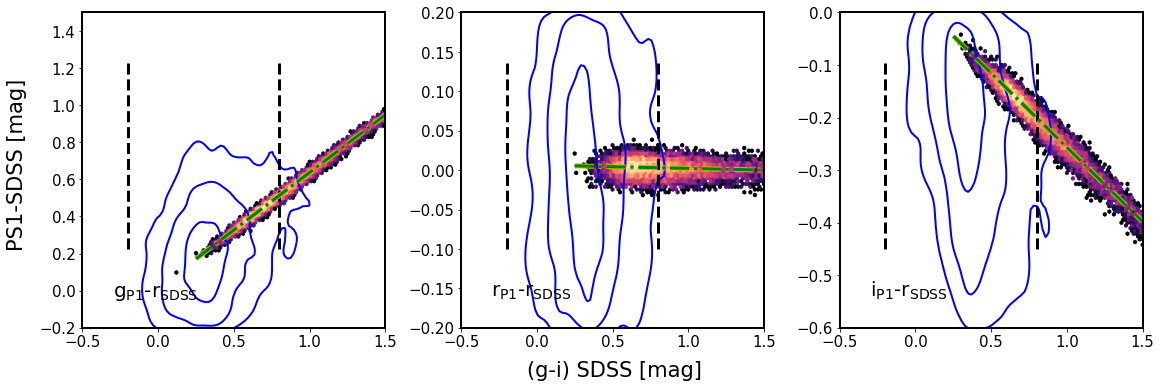

In [115]:

# Use as needed :  Fourth combination:  
# SDSS (g-i) vs PS1(grizy)  - SDSS(rrrrr ) : 
photometric_offset_sdss_ps1(data = sdss_ps1, summary=summary, sdsscolors = 'gi', targetbands = 'r',
                            originbands = 'gri',s82mag = '_mMed', s82err = '_mErr',
                            cutoffmag = 19 , xlims = [-0.5,1.5] ,
                            correct_extinction = False ,ebv_sfd = None,
                            extinction = None, nrows = 1, ncols =3, )

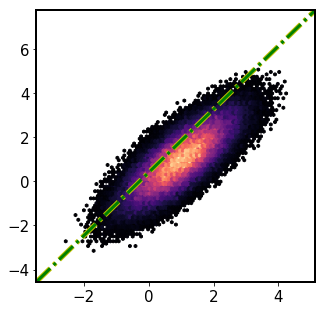

In [113]:
import matplotlib.patheffects as pe

fig,ax = plt.subplots(1,1,figsize=(5,5))
N = 100000
ysig = 0.8
x = np.random.normal(1,1,N)
y = x  + np.random.normal(0,ysig,N)
plt.hexbin(x,y, cmap='magma', mincnt=3)
xs = np.linspace(min(x), max(x), 100)
ys = np.linspace(min(y), max(y), 100)
plt.plot(xs,ys, c= 'g', lw=3, ls='-.',
         path_effects=[pe.Stroke(linewidth=5, foreground='y'), pe.Normal()])